# Final Assignment


## Suicidal Rate based on Age, sex, and reasons per year from 1950 to 2021



## About the Data


There are two Data sets containing information of people's age, sex, marital status and various reasons for suicidal attempt with motives. From these datasets i will work on my project. 

Every year 703 000 people take their own life and there are many more people who attempt suicide. Every suicide is a tragedy that affects families, communities and entire countries and has long-lasting effects on the people left behind. Suicide occurs throughout the lifespan and was the fourth leading cause of death among 15-29 year-olds globally in 2019.

These datasets contain figures on deaths due to suicides, as far as residents of the Netherlands are concerned. The figures are broken down by marital status, method of suicide, motive for suicide, age and gender.

The figures in this dataset correspond to those from the cause of death statistics, because they are based on the same source files. However, the cause of death statistics do not contain any data on the motive for suicide. For the period 1950-1995, this data has been taken from a historical Suicide file. For the period 1996-present, the motif is taken from the Non-Natural Death file. For this two datasets i have prepared two or three research questions for doing my project which are - 

#### Research Question 1 -  Which age group has most suicidal commit rate?
#### Research Question 2 - What are the most common suicidal motives? 
#### Research Question 3 - Find out the suicide rate per year.

# Loading The Data


In [637]:
# Importing necessary libraries 


import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import panel as pn
pn.extension()
from bokeh.layouts import layout
from bokeh.models.widgets import Tabs, Panel
from bokeh.models import FactorRange
from bokeh.io import curdoc
import sklearn
import matplotlib.gridspec as gridspec
import panel.widgets as pnw

import yaml
from bokeh.io import output_notebook,show
from bokeh.plotting import figure, output_file, show
output_notebook()

Loading BokehJS ...

In [638]:
# Using config file for opening two datasets
with open ("config.yaml", "r") as stream:
    config = yaml.safe_load(stream)
file1 = config["directory_of_file1"]
file2 = config["directory_of_file2"]

df_1 = pd.read_csv(file1,sep=";")
df_2 = pd.read_csv(file2,sep=";")

# Data Inspection before cleaning

In [639]:
# firsts dataset
df_1.head()


,ID,Sex,Age,Periods,TotalSuicides_1,Unmarried_2,Married_3,Widowed_4,Divorced_5,HangingStrangulation_6,DrugsMedicinesAlcohol_7,TrainMetro_8,Drowning_9,JumpingFromHeight_10
0,0,T001038,10000,1950JJ00,559,145,275,118,21,222,34,NaN,94,18
1,1,T001038,10000,1951JJ00,618,159,328,121,10,238,30,NaN,128,14
2,2,T001038,10000,1952JJ00,655,167,339,127,22,267,30,NaN,108,18
3,3,T001038,10000,1953JJ00,684,172,354,138,20,258,26,NaN,145,14
4,4,T001038,10000,1954JJ00,663,165,359,122,17,271,31,NaN,105,12


In [640]:
# Inspecting dataframe, datatypes, column and row counts for dataframe 1

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1944 non-null   int64  
 1   Sex                      1944 non-null   object 
 2   Age                      1944 non-null   int64  
 3   Periods                  1944 non-null   object 
 4   TotalSuicides_1          1944 non-null   int64  
 5   Unmarried_2              1944 non-null   int64  
 6   Married_3                1944 non-null   int64  
 7   Widowed_4                1944 non-null   int64  
 8   Divorced_5               1944 non-null   int64  
 9   HangingStrangulation_6   1944 non-null   int64  
 10  DrugsMedicinesAlcohol_7  1944 non-null   int64  
 11  TrainMetro_8             1161 non-null   float64
 12  Drowning_9               1944 non-null   int64  
 13  JumpingFromHeight_10     1944 non-null   int64  
dtypes: float64(1), int64(11)

In [641]:
# checking for missing value in dataframe 1

df_1.isnull().sum()

ID                           0
Sex                          0
Age                          0
Periods                      0
TotalSuicides_1              0
Unmarried_2                  0
Married_3                    0
Widowed_4                    0
Divorced_5                   0
HangingStrangulation_6       0
DrugsMedicinesAlcohol_7      0
TrainMetro_8               783
Drowning_9                   0
JumpingFromHeight_10         0
dtype: int64

In [642]:
# Inspecting dataframe, datatypes, column and row counts for dataframe 2

df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        1944 non-null   int64 
 1   Sex                       1944 non-null   object
 2   Age                       1944 non-null   int64 
 3   Periods                   1944 non-null   object
 4   MentalDisorder_13         1944 non-null   int64 
 5   PhysicalDisorder_14       1944 non-null   int64 
 6   DomesticCircumstances_15  1944 non-null   int64 
 7   OtherMotive_16            1944 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 121.6+ KB


In [643]:
# checking for missing value in dataframe 2

df_2.isnull().sum()

ID                          0
Sex                         0
Age                         0
Periods                     0
MentalDisorder_13           0
PhysicalDisorder_14         0
DomesticCircumstances_15    0
OtherMotive_16              0
dtype: int64

## Observations - 

     Needs to clean the data for both datasets 
     Needs to change the datatypes for many columns 
     Have to replace the nan values with 0


# Data Cleaning

In [644]:
# Data Cleaning : Column name change for Table 1
cleaned_df1 = df_1.rename(columns={'TotalSuicides_1': 'TotalSuicides', 'Unmarried_2': 'Unmarried', 'Married_3': 'Married', 'Widowed_4': 'Widowed', 'Divorced_5': 'Divorced', 'HangingStrangulation_6': 'HangingStrangulation', 'DrugsMedicinesAlcohol_7': 'DrugsMedicinesAlcohol', 'TrainMetro_8': 'TrainMetro', 'Drowning_9': 'Drowning', 'JumpingFromHeight_10': 'JumpingFromHeight'})

# Data Cleaning : replacing the values inside the column for better understanding and also for correct datatypes
cleaned_df1["Sex"] = cleaned_df1["Sex"].replace({'T001038':'Both','4000':'Women','3000':'Men'}, regex=True)
cleaned_df1["Age"] = cleaned_df1["Age"].replace({10000:'All Ages',21700:'80>',41400:'<20', 60300:'20-29', 60400:'30-39', 60500:'40-49',60600:'50-59',60700:'60-69',60800:'70-79'}, regex=True)
cleaned_df1

,ID,Sex,Age,Periods,TotalSuicides,Unmarried,Married,Widowed,Divorced,HangingStrangulation,DrugsMedicinesAlcohol,TrainMetro,Drowning,JumpingFromHeight
0,0,Both,All Ages,1950JJ00,559,145,275,118,21,222,34,NaN,94,18
1,1,Both,All Ages,1951JJ00,618,159,328,121,10,238,30,NaN,128,14
2,2,Both,All Ages,1952JJ00,655,167,339,127,22,267,30,NaN,108,18
3,3,Both,All Ages,1953JJ00,684,172,354,138,20,258,26,NaN,145,14
4,4,Both,All Ages,1954JJ00,663,165,359,122,17,271,31,NaN,105,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939,1939,Women,80>,2017JJ00,41,1,4,30,6,5,17,0.0,5,4
1940,1940,Women,80>,2018JJ00,38,1,6,27,4,9,17,0.0,4,7
1941,1941,Women,80>,2019JJ00,32,5,6,19,2,6,11,0.0,6,5
1942,1942,Women,80>,2020JJ00,49,1,10,30,8,4,25,0.0,7,7


In [645]:
# Data Cleaning : Column name change for Table 2
cleaned_df2 = df_2.rename(columns={'MentalDisorder_13': 'MentalDisorder', 'PhysicalDisorder_14': 'PhysicalDisorder', 'DomesticCircumstances_15': 'DomesticCircumstances', 'OtherMotive_16': 'OtherMotive'})


# Data Cleaning : replacing the values inside the column for better understanding and also for correct datatypes
cleaned_df2["Periods"] = cleaned_df2["Periods"].replace({'JJ00':''}, regex=True)
cleaned_df2["Sex"] = cleaned_df2["Sex"].replace({'T001038':'Both','4000':'Women','3000':'Men'}, regex=True)
cleaned_df2["Age"] = cleaned_df2["Age"].replace({10000:'All Ages',21700:'80>',41400:'<20', 60300:'20-29', 60400:'30-39', 60500:'40-49',60600:'50-59',60700:'60-69',60800:'70-79'}, regex=True)
#cleaned_df2.drop
cleaned_df2


,ID,Sex,Age,Periods,MentalDisorder,PhysicalDisorder,DomesticCircumstances,OtherMotive
0,0,Both,All Ages,1950,197,50,12,75
1,1,Both,All Ages,1951,0,0,0,0
2,2,Both,All Ages,1952,0,0,0,0
3,3,Both,All Ages,1953,0,0,0,0
4,4,Both,All Ages,1954,0,0,0,0
...,...,...,...,...,...,...,...,...
1939,1939,Women,80>,2017,17,13,0,6
1940,1940,Women,80>,2018,21,9,1,2
1941,1941,Women,80>,2019,12,8,0,5
1942,1942,Women,80>,2020,27,8,1,4


# Combining Data

In [646]:
# Merging two Dataframe where the main Dataframe name is "final_df"
final_df = pd.merge(cleaned_df1, cleaned_df2,on = "ID")
final_df = final_df.set_index("ID")

final_df= final_df.drop(['Sex_x', 'Age_x','Periods_x'],axis = 1)
final_df = final_df.rename(columns={'Sex_y': 'Sex', 'Age_y': 'Age', 'Periods_y': 'Periods'})

# after merging chaning the column positions for better understaing
final_df= final_df.iloc[:, [10,11,12,0,1,2,3,4,5,6,7,8,9,13,14,15,16]]



# replacing  all the rows nan Values with 0 
final_df = final_df.fillna(0)

# converting the datatypes for plotting the graphs later
final_df = final_df[final_df['Age']!='All Ages']
final_df['Age'] = final_df['Age'].astype('category')
final_df["Periods"] = final_df['Periods'].astype('int64')
final_df["Sex"] = final_df['Sex'].astype('category')
final_df["TrainMetro"] = final_df["TrainMetro"].astype("int64")
final_df

,Sex,Age,Periods,TotalSuicides,Unmarried,Married,Widowed,Divorced,HangingStrangulation,DrugsMedicinesAlcohol,TrainMetro,Drowning,JumpingFromHeight,MentalDisorder,PhysicalDisorder,DomesticCircumstances,OtherMotive
ID,,,,,,,,,,,,,,,,,
72,Both,<20,1950,20,20,0,0,0,10,1,0,2,0,4,0,0,0
73,Both,<20,1951,13,13,0,0,0,8,0,0,3,1,0,0,0,0
74,Both,<20,1952,11,11,0,0,0,5,0,0,0,0,0,0,0,0
75,Both,<20,1953,17,16,1,0,0,9,0,0,1,1,0,0,0,0
76,Both,<20,1954,16,15,1,0,0,9,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939,Women,80>,2017,41,1,4,30,6,5,17,0,5,4,17,13,0,6
1940,Women,80>,2018,38,1,6,27,4,9,17,0,4,7,21,9,1,2
1941,Women,80>,2019,32,5,6,19,2,6,11,0,6,5,12,8,0,5


# Data Inspection after cleaning

In [647]:
# No null values left
final_df.isnull().sum()

Sex                      0
Age                      0
Periods                  0
TotalSuicides            0
Unmarried                0
Married                  0
Widowed                  0
Divorced                 0
HangingStrangulation     0
DrugsMedicinesAlcohol    0
TrainMetro               0
Drowning                 0
JumpingFromHeight        0
MentalDisorder           0
PhysicalDisorder         0
DomesticCircumstances    0
OtherMotive              0
dtype: int64

In [648]:
# for using the years in slider later from year to year
final_df["Periods"].unique()

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [649]:
# All the datatypes are now usable 
final_df.dtypes

Sex                      category
Age                      category
Periods                     int64
TotalSuicides               int64
Unmarried                   int64
Married                     int64
Widowed                     int64
Divorced                    int64
HangingStrangulation        int64
DrugsMedicinesAlcohol       int64
TrainMetro                  int64
Drowning                    int64
JumpingFromHeight           int64
MentalDisorder              int64
PhysicalDisorder            int64
DomesticCircumstances       int64
OtherMotive                 int64
dtype: object

In [650]:
# total number of suicide due to differnet motives 

total_suicide = []
motives = list(final_df.columns[8:])
    
for values in motives:
    total_suicide.append(final_df[values].sum())
total_suicide




[77744, 30694, 15632, 22046, 14600, 80030, 12322, 13926, 14650]

In [651]:
 # printing only the motives and their total values 

print(f'Here are all the suicidal commit Motives -\nHanging Strangulation - {final_df["HangingStrangulation"].sum()}\nDrugs,Medicines,alcohol - {final_df["DrugsMedicinesAlcohol"].sum()}\nTrain Metro - {final_df["TrainMetro"].sum()}\nDrowning - {final_df["Drowning"].sum()}\nJumping From Height - {final_df["JumpingFromHeight"].sum()}\nMental Disorder - {final_df["MentalDisorder"].sum()}\nPhysical Disorder - {final_df["PhysicalDisorder"].sum()}\nDomestic Circumstances - {final_df["DomesticCircumstances"].sum()}\nOther Motives - {final_df["OtherMotive"].sum()}')


Here are all the suicidal commit Motives -
Hanging Strangulation - 77744
Drugs,Medicines,alcohol - 30694
Train Metro - 15632
Drowning - 22046
Jumping From Height - 14600
Mental Disorder - 80030
Physical Disorder - 12322
Domestic Circumstances - 13926
Other Motives - 14650


In [652]:
# Making a dataframe only for reason of the suicides for making a better plot

data = [['HangingStrangulation', 77744], ['DrugsMedicinesAlcohol', 30694], ['TrainMetro', 15632], ['Drowning', 15], ['JumpingFromHeight ', 14600], ['MentalDisorder', 80030], ['PhysicalDisorder', 12322], ['DomesticCircumstances', 13926], ['OtherMotives', 14650]]
suicide_df = pd.DataFrame(data, columns=['SuicideMotives', 'Counts'])

suicide_df


,SuicideMotives,Counts
0,HangingStrangulation,77744
1,DrugsMedicinesAlcohol,30694
2,TrainMetro,15632
3,Drowning,15
4,JumpingFromHeight,14600
5,MentalDisorder,80030
6,PhysicalDisorder,12322
7,DomesticCircumstances,13926
8,OtherMotives,14650


## All required functions for the project

In [653]:
# function for graph of analysis of suicide by age category,gender and motives

def create_figure1(plot1_f1,plot1_f2, plot2_f1,plot2_f2, plot3_f1, plot3_f2):
    with plt.style.context(("seaborn","ggplot")):
        fig = plt.figure(constrained_layout=True, figsize=(15,13))
        specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
        
        ax1 = fig.add_subplot(specs[0, :]) ## First Row
        ax2 = fig.add_subplot(specs[1, 0]) ## Second Row First Column
        ax3 = fig.add_subplot(specs[1, 1]) ## Second Row Second Colums
        
        #first graph
        ages = final_df[plot1_f2].unique()
        total_suicide = final_df.groupby(plot1_f2)[plot1_f1].sum()

        
        x=total_suicide
        y=ages
        sns.barplot(ax = ax1,x=x,y=y,  palette=colors_from_values(x, "YlOrRd"))
        ax1.set_xlabel("Total Suicide",fontdict={"fontweight":"bold","fontsize":12})
        ax1.set_ylabel("Age Category",fontdict={"fontweight":"bold","fontsize":12})
        ax1.set_title("Bar chart of total suicede by Age",fontdict={"fontweight":"bold","fontsize":12})
        
        #second graph
        sex = final_df[plot2_f1].unique()
        total_suicide = final_df.groupby(plot2_f1)[plot2_f2].sum()

        
        x=sex
        y= total_suicide
        sns.barplot(ax= ax2,x=x,y=y, palette=colors_from_values(y, "Reds") )
        ax2.set_xlabel("Gender",fontdict={"fontweight":"bold","fontsize":12})
        ax2.set_ylabel("Total Suicide",fontdict={"fontweight":"bold","fontsize":12})
        ax2.set_title("Bar chart of total suicede by Gender",fontdict={"fontweight":"bold","fontsize":12})
        
        #Third graph
        suicide_df1 = suicide_df.sort_values(ascending = False,by="Counts")
    
        
        #ax3.set_xticks(rotation=90, horizontalalignment="center")
        
        motive=suicide_df1[plot3_f1][:]
        su_num=suicide_df1[plot3_f2][:]
        x=motive
        y=su_num
        sns.barplot(ax = ax3,x=x,y=y, palette="GnBu_r")
        sns.set_style('whitegrid')
        ax3.set_xlabel("Suicide Motives",fontdict={"fontweight":"bold","fontsize":12})
        ax3.set_ylabel("Total Suicides",fontdict={"fontweight":"bold","fontsize":12})
        ax3.set_title("Bar chart of total suicede by Motives",fontdict={"fontweight":"bold","fontsize":12})
        
        
        plt.close(fig)
        return fig
        

In [654]:
# function for showing different kinds of plots of analysis of suicide per year

def create_figure2(plot1e_f1,plot1e_f2, plot2e_f1,plot2e_f2, plot3e_f1, plot3e_f2):
    with plt.style.context(("seaborn","ggplot")):
        fig = plt.figure(constrained_layout=True, figsize=(15,13))
        specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
        
        ax1 = fig.add_subplot(specs[0, :]) ## First Row
        ax2 = fig.add_subplot(specs[1, 0]) ## Second Row First Column
        ax3 = fig.add_subplot(specs[1, 1]) ## Second Row Second Colums
        
        #first graph
        suicide_by_year = final_df.groupby("Periods").mean()["TotalSuicides"]

        
        ax1.plot(suicide_by_year.index, suicide_by_year.values, color = "red")
        ax1.set_xlabel(plot1e_f1,fontdict={"fontweight":"bold","fontsize":12})
        ax1.set_ylabel(plot1e_f2,fontdict={"fontweight":"bold","fontsize":12})
        ax1.set_title("Change in Suicide Rates from 1950 to 2021",fontdict={"fontweight":"bold","fontsize":12})
        
        #second graph
        #plt.figure(figsize=(18,8))
        
        ax2.set_xlabel("Years",fontdict={"fontweight":"bold","fontsize":12})
        sns.set_color_codes("muted")
        sns.barplot(ax = ax2,x=plot2e_f1, y=plot2e_f2, data=final_df, color="r")
        ax2.set_ylabel("Suicide Rate",fontdict={"fontweight":"bold","fontsize":12})
        ax2.set_title("Change in Suicide Rates from 1950 to 2021",fontdict={"fontweight":"bold","fontsize":12})
        #ax2.set_xticks(rotation=90)
        
        #Third graph
        
        ax3.set_xlabel("Years",fontdict={"fontweight":"bold","fontsize":12})
        sns.set_color_codes("muted")
        sns.stripplot(ax = ax3,x=plot3e_f1, y=plot3e_f2, data=final_df, color="r")
        ax3.set_ylabel("Suicide Rate",fontdict={"fontweight":"bold","fontsize":12})
        ax3.set_title("Change in Suicide Rates from 1950 to 2021",fontdict={"fontweight":"bold","fontsize":12})
        #ax3.set_xticks(rotation=90)
        
        
        plt.close(fig)
        return fig

In [655]:
# function for color pallete

def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

In [656]:
# function for making the graph interactive to show motives with suicide number per year using a slider 

def interactive_graph(period):
    df = final_df
    
    df = df[df["Periods"]==period]
    total_suicide = []
    motives = list(df.columns[8:])
    
    for values in motives:
        total_suicide.append(df[values].sum())
        
    # plotting the values for the graph
    p = figure(title = "Total number of Suicides per Year",
               toolbar_location = None,
                y_range = FactorRange(factors = motives),
                width = 750,
                height = 700)
    p.xaxis.axis_label = "Number of Suicide"
    p.hbar(y = motives, right = total_suicide, height = 0.5, fill_color = "#b3de69")
    return p

In [657]:
# function for making the graph interactive to show motives and gender with suicide number per year using a slider 

def interactive_graph2(period):
    
    df = final_df
    
    df = df[df["Periods"]==period]
    total_suicide_male = []
    total_suicide_female = []
    total_suicide_both = []
    
    motives = list(df.columns[8:])
    
    
    for values in motives:
        Men = df[df["Sex"]=="Men"]
        Women = df[df["Sex"]=="Women"]
        Both = df[df["Sex"]=="Both"]
        total_suicide_male.append(Men[values].sum())
        total_suicide_female.append(Women[values].sum())
        total_suicide_both.append(Both[values].sum())
        
        
    data = {"motives":motives, "Men":total_suicide_male,"Women":total_suicide_female,"Both":total_suicide_both}
    gender = ["Men","Women","Both"]   
        
    # plotting the values for the graph
    p = figure(y_range = motives, title = "Total number of Suicides per Year by Gender category",
               toolbar_location = None, tools = "hover", tooltips = "$name: @$name", height = 700, width = 750)
    p.xaxis.axis_label = "Number of Suicide"
    p.hbar_stack(gender, y = "motives", height = 0.5, color = ["white", "white","#FA8072"], source = data, legend_label = gender)
    return p

# Data Exploration

To identify all my research question, i will use different kinds of statistical analysis through different kinds of graph using
bokeh and matplotlib.

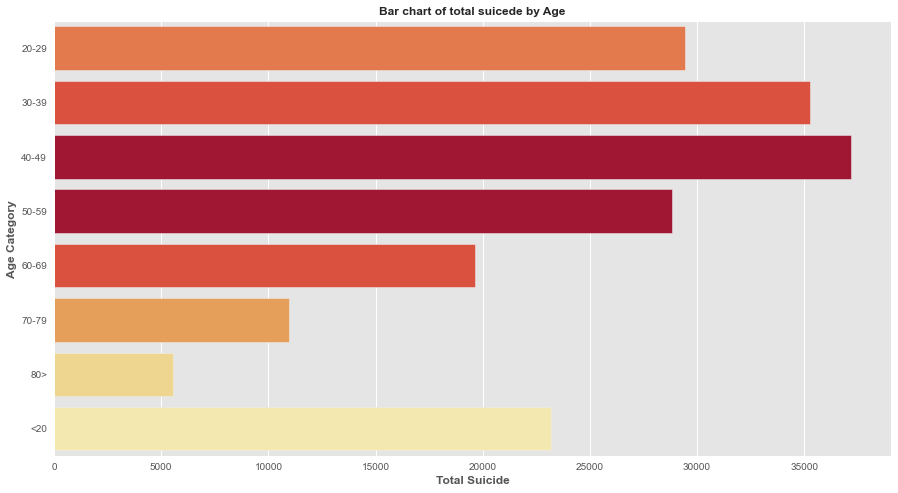

In [658]:
# Graph for checking which age category has the highest suicide rate

with plt.style.context(("seaborn","ggplot")):
    ages = final_df["Age"].unique()
    total_suicide = final_df.groupby("Age")["TotalSuicides"].sum()

    # plotting the values for the graph
    plt.figure(figsize=(15,8))
    x=total_suicide
    y=ages
    sns.barplot(x=x,y=y,  palette=colors_from_values(x, "YlOrRd"))
    plt.xlabel("Total Suicide",fontdict={"fontweight":"bold","fontsize":12})
    plt.ylabel("Age Category",fontdict={"fontweight":"bold","fontsize":12})
    plt.title("Bar chart of total suicede by Age",fontdict={"fontweight":"bold","fontsize":12})
   

As we can see in this graph that the most colored line here with a highest number of suicide is the age group - (40-49)
so clearly we can say that - Age group (40-49) has the most suicidal commit rate.

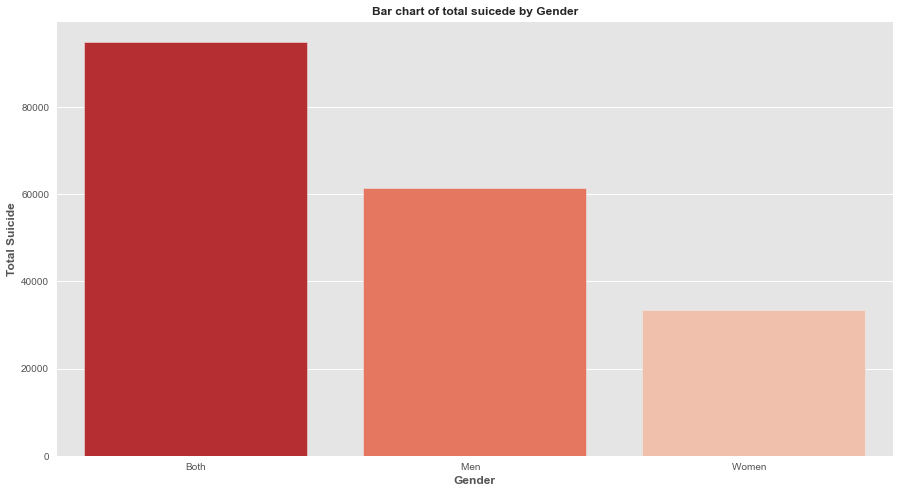

In [659]:
# Graph for checking which gender has the most commit rate for suicide

with plt.style.context(("seaborn","ggplot")):

    sex = final_df["Sex"].unique()
    total_suicide = final_df.groupby("Sex")["TotalSuicides"].sum()

    # plotting the values for the graph
    plt.figure(figsize=(15,8))
    x=sex
    y= total_suicide
    sns.barplot(x=x,y=y, palette=colors_from_values(y, "Reds") )
    plt.xlabel("Gender",fontdict={"fontweight":"bold","fontsize":12})
    plt.ylabel("Total Suicide",fontdict={"fontweight":"bold","fontsize":12})
    plt.title("Bar chart of total suicede by Gender",fontdict={"fontweight":"bold","fontsize":12})






As we can see in this picture, three categories of gender - male, female and both and in both category there is the most suicidal rate which is onvious cause its all together with male and female. However Category male has the most suicidal commit rate.

In [660]:
# Here is a graph for all kind of combination of suicide motive, reason, compared with gender
# sns.pairplot(final_df, hue="Sex")
# plt.show()

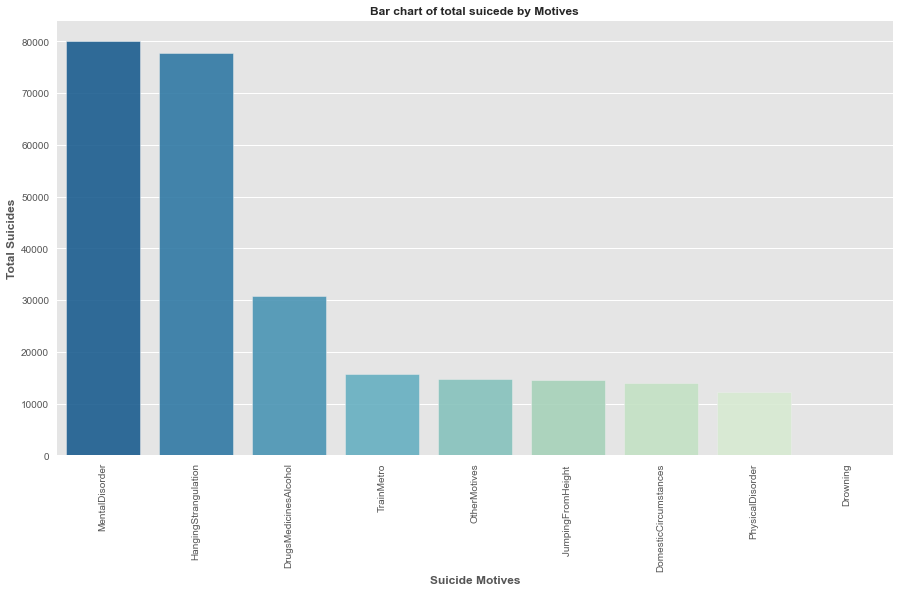

In [661]:
# Graph of suicide rates due to each motives 

with plt.style.context(("seaborn","ggplot")):
    
    suicide_df = suicide_df.sort_values(ascending = False,by="Counts")
    
    # plotting the values for the graph
    plt.figure(figsize=(15,8))
    motive=suicide_df["SuicideMotives"][:]
    su_num=suicide_df["Counts"][:]
    x=motive
    y=su_num
    sns.barplot(x=x,y=y, palette="GnBu_r",alpha = 0.9)
    sns.set_style('whitegrid')
    plt.xticks(rotation=90, horizontalalignment="center")
    plt.xlabel("Suicide Motives",fontdict={"fontweight":"bold","fontsize":12})
    plt.ylabel("Total Suicides",fontdict={"fontweight":"bold","fontsize":12})
    plt.title("Bar chart of total suicede by Motives",fontdict={"fontweight":"bold","fontsize":12})


In this graph i have made the death rate for each reason in a sorted value for better understanding and the most common suicide attempt motive is "Mental Disorder". Hanging Strangulation is also close to mental disorder. so we can say both of the motive has the most suicidal rate.

### Different types of Graph for Suicide per year

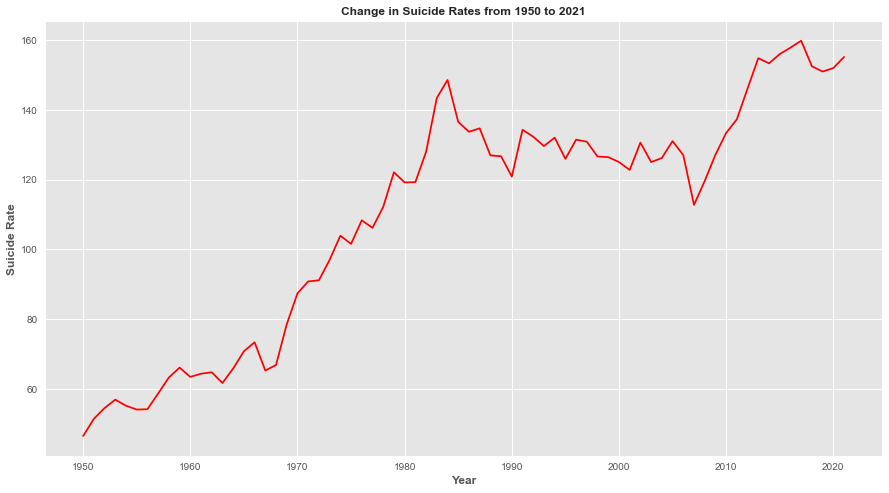

In [662]:
# A line graph for suicide rate per year
with plt.style.context(("seaborn","ggplot")):

    suicide_by_year = final_df.groupby("Periods").mean()["TotalSuicides"]

    # plotting the values for the graph
    plt.figure(figsize=(15,8))
    plt.plot(suicide_by_year.index, suicide_by_year.values, color = "red")
    plt.xlabel("Year",fontdict={"fontweight":"bold","fontsize":12})
    plt.ylabel("Suicide Rate",fontdict={"fontweight":"bold","fontsize":12})
    plt.title("Change in Suicide Rates from 1950 to 2021",fontdict={"fontweight":"bold","fontsize":12})


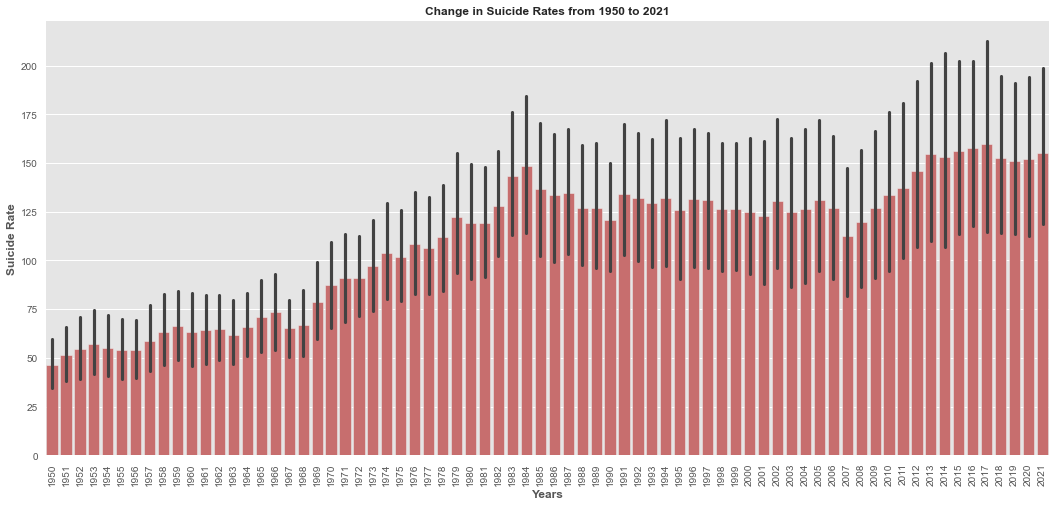

In [663]:
# A bar plot for suicide rate per year

with plt.style.context(("seaborn","ggplot")):
    
    
    # plotting the values for the graph
    plt.figure(figsize=(18,8))
    sns.set_color_codes("muted")
    sns.barplot(x="Periods", y="TotalSuicides", data=final_df, color="r")
    plt.xlabel("Years",fontdict={"fontweight":"bold","fontsize":12})
    plt.ylabel("Suicide Rate",fontdict={"fontweight":"bold","fontsize":12})
    plt.title("Change in Suicide Rates from 1950 to 2021",fontdict={"fontweight":"bold","fontsize":12})
    plt.xticks(rotation=90)


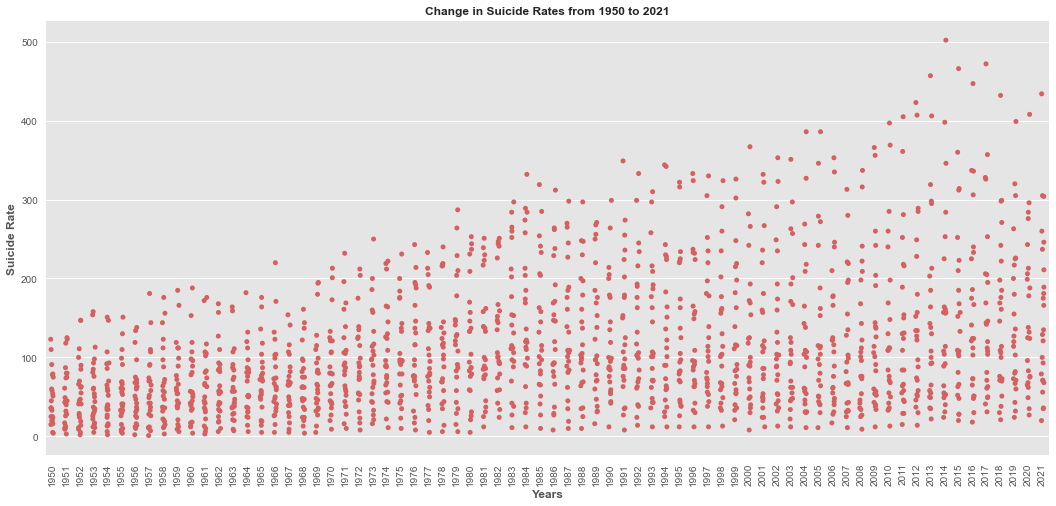

In [664]:
# A strip plot for suicide rate per year

with plt.style.context(("seaborn","ggplot")):

    
    # plotting the values for the graph
    plt.figure(figsize=(18,8))
    sns.set_color_codes("muted")
    sns.stripplot(x="Periods", y="TotalSuicides", data=final_df, color="r")
    plt.xlabel("Years",fontdict={"fontweight":"bold","fontsize":12})
    plt.ylabel("Suicide Rate",fontdict={"fontweight":"bold","fontsize":12})
    plt.title("Change in Suicide Rates from 1950 to 2021",fontdict={"fontweight":"bold","fontsize":12})
    plt.xticks(rotation=90)


So we can see from three different graphs that suicide rate has increased over the times

In [665]:
# calling the functions for ploting graph and putting those in variables to make it interactive later in dashboard

fig1 =create_figure1("TotalSuicides", "Age", "Sex", "TotalSuicides","SuicideMotives","Counts")

In [666]:
# calling the functions for ploting graph and putting those in variables to make it interactive later in dashboard

fig2 = create_figure2("Periods", "TotalSuicides", "Periods", "TotalSuicides","Periods","TotalSuicides")

# Dashboard - Data Visualisation
        

In [667]:
# setting up the slider for year and calling the function for a interactive graph of suicides per year
year = pn.widgets.IntSlider(name='Year', start=1950,end=2021)
deathPerYear = pn.interact(interactive_graph,period = year)
pn.Row(deathPerYear)

Row(sizing_mode='stretch_width')
    [0] Column(sizing_mode='stretch_width')
        [0] Column(sizing_mode='stretch_width')
            [0] IntSlider(end=2021, name='Year', sizing_mode='stretch_width', start=1950, value=1950)
        [1] Row(sizing_mode='stretch_width')
            [0] Bokeh(Figure, name='interactive02167', sizing_mode='stretch_width')

In [668]:
# settting up the slider for year and calling the function for a interactive graph of suicides per year with gender and motive as well.

year = pn.widgets.IntSlider(name='Year', start=1950,end=2021)
deathPerGender = pn.interact(interactive_graph2, period = year)
pn.Row(deathPerGender)

Row(sizing_mode='stretch_width')
    [0] Column(sizing_mode='stretch_width')
        [0] Column(sizing_mode='stretch_width')
            [0] IntSlider(end=2021, name='Year', sizing_mode='stretch_width', start=1950, value=1950)
        [1] Row(sizing_mode='stretch_width')
            [0] Bokeh(Figure, name='interactive02177', sizing_mode='stretch_width')

## Main Dashboard

In [669]:
pn.extension(sizing_mode = 'stretch_width')
dashboard = pn.template.BootstrapTemplate(title='Suicidal Rate Analysis',header_background='#fd7e14',
    theme = 'default',
    accent_base_color="#b33e56",
    
    sidebar =[pn.pane.Markdown("## Suicide rate" ),
              pn.pane.Markdown("Every year 703 000 people take their own life and there are many more people who attempt suicide. Every suicide is a tragedy that affects families, communities and entire countries and has long-lasting effects on the people left behind. Suicide occurs throughout the lifespan and was the fourth leading cause of death among 15-29 year-olds globally in 2019."),
              pn.pane.Markdown("These graphs contains reason of deaths due to suicides, as far as residents of the Netherlands are concerned. The figures are broken down by marital status, method of suicide, motive for suicide, age and gender."),
              pn.pane.Markdown("The figures here are corresponded to those from the cause of death statistics, because they are based on the same source files. However, the cause of death statistics do not contain any data on the motive for suicide. For the period 1950-1995, this data has been taken from a historical Suicide file. For the period 1996-present, the motif is taken from the Non-Natural Death file"),
              pn.pane.Markdown("In this dashboard there are 2 horizontal bar plots where you can check the suicide per year by motive and gender category and other graphs are for showing most common suicide cause, suicide rate by age category, suicide rate by gender also changes in suicide rate from 1950 to 2021. ")],
    
    main = [pn.Row(pn.Column(deathPerYear)),
            pn.Row(pn.Column(deathPerGender)),
            pn.Row(pn.Column(fig1)),
            pn.Row(pn.Column(fig2)),
            
            
            ])

dashboard.show()



Launching server at http://localhost:56060


In this project i tried to find out the total suicide rate per year by the category age and gender also the most common reason for attempting suicide for both men and women. 
I hope i tried reaching every aspects of the requirement of this project.